In [2]:
%matplotlib inline
# %matplotlib

In [60]:
from __future__ import division

In [3]:
import numpy as np
import pandas as pd
import sklearn as skl
import sklearn.preprocessing as ppro
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.pipeline import Pipeline

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
tax_path = "/home/gus/MEGAsync/zim/main/BCH/Projects/Amy/2016-01-07_~_16s_data/otu_table_mc2_w_tax_no_pynast_failures.biom.TAXON.tsv"
map_path = "/home/gus/MEGAsync/zim/main/BCH/Projects/Amy/2016-01-07_~_16s_data/BL6SPFDec16map.txt"

In [34]:
tax = pd.read_csv(filepath_or_buffer=tax_path, sep='\t', 
                  quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None)

meta = pd.read_csv(filepath_or_buffer=map_path, sep='\t')

In [35]:
tax.head()

,OTU ID,23,25,27,28,30,39,41,8,24,7,9,5
0,206494,33,16,190,11,92,12,2272,2,0,0,0,0
1,276629,0,0,1,0,0,0,0,0,1,1,0,0
2,276620,0,0,0,0,0,0,0,0,2,1,1,0
3,330294,0,0,0,0,0,0,2,0,0,0,2,0
4,184456,1,0,0,0,0,0,1,0,0,0,0,0


In [36]:
tax.index = tax['OTU ID'].values
tax = tax.drop(['OTU ID'],axis=1)

In [67]:
tax_scaled = tax.apply(lambda m: (m - m.mean())/m.std())

In [70]:
tax_scaled

,23,25,27,28,30,39,41,8,24,7,9,5
206494,0.210903,0.129889,1.898329,0.021620,0.815903,0.091910,27.588019,-0.027494,-0.074783,-0.075372,-0.085231,-0.074049
276629,-0.071552,-0.074745,-0.081320,-0.080905,-0.086465,-0.081246,-0.086087,-0.084607,-0.062353,-0.069721,-0.085231,-0.074049
276620,-0.071552,-0.074745,-0.091795,-0.080905,-0.086465,-0.081246,-0.086087,-0.084607,-0.049923,-0.069721,-0.072785,-0.074049
330294,-0.071552,-0.074745,-0.091795,-0.080905,-0.086465,-0.081246,-0.061726,-0.084607,-0.074783,-0.075372,-0.060338,-0.074049
184456,-0.062992,-0.074745,-0.091795,-0.080905,-0.086465,-0.081246,-0.073906,-0.084607,-0.074783,-0.075372,-0.085231,-0.074049


In [38]:
s = tax.sum()

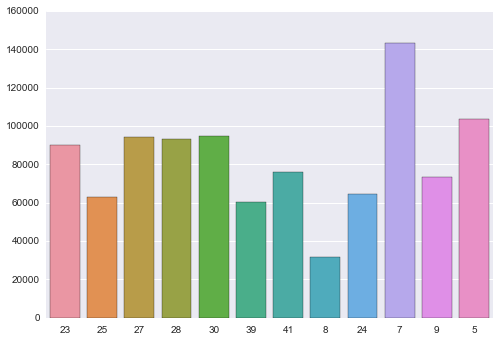

In [39]:
sns.barplot(x=s.index.values,y=s);

In [92]:
meta.SampleID = meta.SampleID.astype(str)

# Join meta data

In [93]:
meta.set_index('SampleID')

,Mouse ID,Gender,DOB,Ear Tag,Genotype1,Genotype,Cage,Notes
SampleID,,,,,,,,
23,I175,F,7/6/15,R,WT,WT (08/25/15) cre+ (08/26/15),943947,Parent cage 892230
24,I176,F,7/5/15,L,WT,WT,943947,Parent cage 892234
25,I177,F,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943947,Parent cage 892221
41,I208,F,7/1/15,RL,WT,WT,943947,Parent cage 892226
27,I179,F,7/7/15,2L,WKO,WKO (8/20/15),943947,Parent cage 892227
5,I180,M,7/7/15,R,WKO,WKO (8/20/15),943948,Parent cage 892227
7,I182,M,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943948,Parent cage 892221
8,I183,M,7/1/15,RL,WT,WT,943948,Parent cage 892226
9,I184,M,7/1/15,2L,WT,WT,943948,Parent cage 892226


In [97]:
full_table = meta.set_index('SampleID').join(tax_scaled.T).reset_index()

In [111]:
full_table.head()

,SampleID,Mouse ID,Gender,DOB,Ear Tag,Genotype1,Genotype,Cage,Notes,206494,...,New.CleanUp.ReferenceOTU56003,New.CleanUp.ReferenceOTU56005,New.CleanUp.ReferenceOTU56008,New.CleanUp.ReferenceOTU56017,New.CleanUp.ReferenceOTU56020,New.CleanUp.ReferenceOTU56032,New.CleanUp.ReferenceOTU56042,New.CleanUp.ReferenceOTU56061,New.CleanUp.ReferenceOTU56065,New.CleanUp.ReferenceOTU56069
0,23,I175,F,7/6/15,R,WT,WT (08/25/15) cre+ (08/26/15),943947,Parent cage 892230,0.210903,...,-0.062992,-0.071552,-0.062992,-0.062992,-0.071552,-0.071552,-0.071552,-0.071552,-0.071552,-0.071552
1,24,I176,F,7/5/15,L,WT,WT,943947,Parent cage 892234,-0.074783,...,-0.074783,-0.074783,-0.074783,-0.074783,-0.074783,-0.074783,-0.074783,-0.074783,-0.074783,-0.074783
2,25,I177,F,7/4/15,-,TregWKO,WASp fl/fl (08/25/15) cre+ (09/08/15),943947,Parent cage 892221,0.129889,...,-0.074745,-0.061956,-0.074745,-0.074745,-0.061956,-0.074745,-0.074745,-0.061956,-0.074745,-0.074745
3,41,I208,F,7/1/15,RL,WT,WT,943947,Parent cage 892226,27.588019,...,-0.086087,-0.086087,-0.086087,-0.086087,-0.086087,-0.086087,-0.086087,-0.086087,-0.086087,-0.086087
4,27,I179,F,7/7/15,2L,WKO,WKO (8/20/15),943947,Parent cage 892227,1.898329,...,-0.091795,-0.091795,-0.091795,-0.091795,-0.091795,-0.091795,-0.081320,-0.081320,-0.081320,-0.091795


# Set up pipeline

1. scale data to between 0 and 1 within each sample


In [15]:
scaler_minmax = ppro.MinMaxScaler()

clf_rfst = RandomForestClassifier(n_estimators=30, criterion='gini', 
                                max_depth=None, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features='auto', max_leaf_nodes=None, 
                                bootstrap=True, oob_score=False, n_jobs=6,
                                random_state=None, verbose=0, warm_start=False, class_weight=None)

clf_svm = svm.SVC(kernel='linear')



In [16]:
pipe_rfst = Pipeline([('scaler',scaler_minmax),
                      ('clf_rfst', clf_rfst)
                     ])

In [ ]:
X, y = 

In [ ]:
pipe_rfst.fit()